In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import sklearn as sk

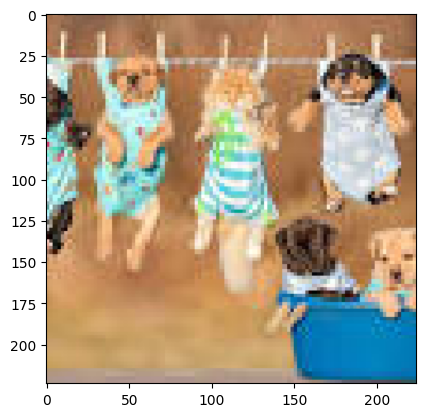

In [20]:
import numpy as np
import cv2 as c
import matplotlib.pyplot as plt


img = image.load_img("./e6589c8a-dc05-4f15-9238-fa9e25e36c1d/image.jpeg",target_size=(224,224))
plt.imshow(img)

In [21]:
mobile = tf.keras.applications.mobilenet.MobileNet()
resize = image.img_to_array(img)
final_img = np.expand_dims(resize,axis=0)
final_img = tf.keras.applications.mobilenet.preprocess_input(final_img)


In [22]:
resize.shape

(224, 224, 3)

In [23]:
predict = mobile.predict(final_img)
print(predict)


2022-10-23 13:32:11.624626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
[[3.93443216e-08 8.89532146e-07 2.38963977e-08 1.54875657e-09
  1.89737759e-09 1.42235237e-07 5.03336484e-09 5.67171590e-08
  2.90474048e-07 8.73956026e-07 9.34490072e-06 1.46468415e-06
  3.29074759e-08 5.04749886e-09 1.10152234e-06 3.92684996e-07
  7.90974042e-08 7.48283298e-07 5.96104233e-09 1.16725580e-08
  1.35602303e-08 2.99070052e-07 1.17520871e-09 5.98864176e-08
  9.15919074e-08 1.48898440e-08 8.71823431e-08 1.98489989e-08
  4.73638053e-08 2.52147476e-08 4.64351331e-08 2.26068619e-06
  3.25824033e-07 3.50860375e-07 1.17935656e-07 6.35151265e-10
  3.23974048e-09 4.32250369e-09 1.48317656e-06 2.25214292e-10
  5.37750344e-10 4.84776592e-08 7.76224329e-09 8.59384173e-08
  1.44223689e-09 1.97427937e-07 1.21651189e-09 1.71782339e-08
  3.48962303e-09 6.32203134e-09 1.13843890e-09 7.83327252e-08
  2.10297095e-08 6.07631367e-09 2.29248158e-08 1.94098404e-09
  6.62546071e-08 3.66887254e-09 8.92681318e-10 1.55112923e-06
  2.26387460e-08 3.2

In [25]:
from unittest import result
from tensorflow.keras.applications import imagenet_utils
result = imagenet_utils.decode_predictions(predict)
print(result)


[[('n03535780', 'horizontal_bar', 0.8375295), ('n04355933', 'sunglass', 0.08717075), ('n04371430', 'swimming_trunks', 0.014540115), ('n02087046', 'toy_terrier', 0.011500576), ('n03888605', 'parallel_bars', 0.007615734)]]


In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)